In [1]:
#Liên kết với google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Thêm các thư viện
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.utils import  to_categorical

In [3]:
#Đọc file
path = '/content/drive/My Drive/Data/A_Z Handwritten Data.csv'
df = pd.read_csv(path)
print(df.shape)
df.head()

(372450, 785)


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Các nhãn
df['0'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [5]:
#Lấy mỗi nhãn 1000 dòng dữ liệu
data = df.sample(frac=1).groupby('0', sort = True).head(1000).reset_index()
print(sorted(data['0'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


In [6]:
data = data.drop('index', axis = 1)
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#Chia X, y
X = data.drop('0',axis = 1)
y = data['0']
#Chia train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [8]:
#Lấy ra 10 dòng dữ liệu
img_list = []
for i in range(10):
  z = list(X.iloc[i].values)
  count = 0
  img =[]
  while count < 784:
    img.append(z[count:count+28])
    count = count + 28
  img_list.append(img)

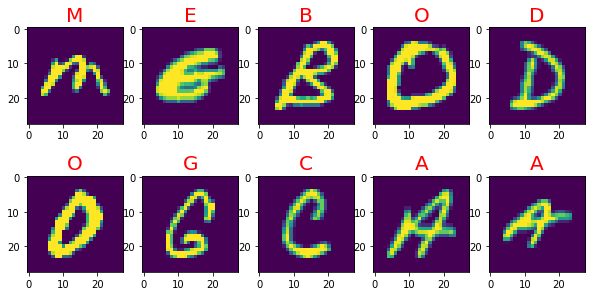

In [9]:
word_dict = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 9:'J', 10:'K', 11:'L', 12:'M', 13:'N', 14:'O', 15:'P', 16:'Q', 17:'R', 18:'S', 19:'T', 20:'U', 21:'V', 22:'W', 23:'X', 24:'Y', 25:'Z'}
#In thành hình ảnh
fig = plt.figure(figsize=(10, 5))
for i in range(10):
  fig.add_subplot(2, 5, i+1)
  plt.imshow(img_list[i])
  plt.title(label = word_dict[y.values[i]], fontsize = 20, color = 'red')

plt.show()

In [10]:
#Reshape X, y để fit với model
X_train2 = np.reshape(X_train.values, (X_train.shape[0], 28, 28, 1))
X_test2 = np.reshape(X_test.values, (X_test.shape[0], 28, 28, 1))
y_train2 = to_categorical(y_train.values, 26)
y_test2 = to_categorical(y_test.values, 26)

In [11]:
#Model
my_model = Sequential()

my_model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
my_model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

my_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
my_model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

my_model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding = 'valid'))
my_model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

my_model.add(Flatten())

my_model.add(Dense(64, activation = "relu"))
my_model.add(Dense(128, activation = "relu"))

my_model.add(Dense(26, activation = "softmax"))

In [12]:
#Fit dữ liệu vào model
my_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = my_model.fit(X_train2, y_train2, epochs = 1, validation_data = (X_test2, y_test2))

650/650 [==============================] - 35s 52ms/step - loss: 0.9493 - accuracy: 0.7353 - val_loss: 0.3834 - val_accuracy: 0.8785


In [13]:
#Lấy 10 ảnh để test
img_test_list = []
for i in range(10):
  z = list(X_test.iloc[i].values)
  count = 0
  img =[]
  while count < 784:
    img.append(z[count:count+28])
    count = count + 28
  img_test_list.append(img)

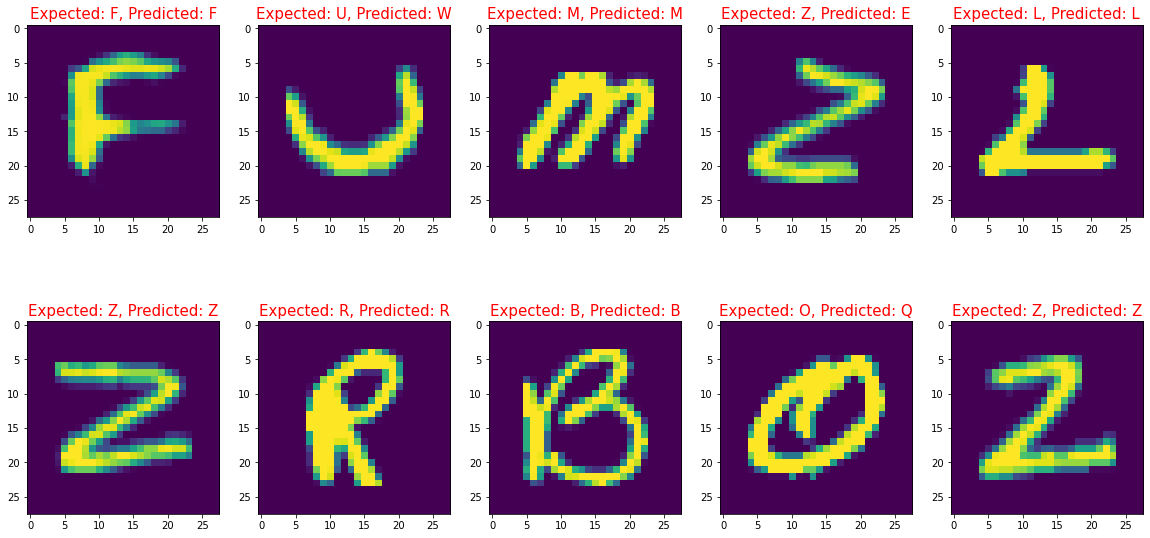

In [14]:
#In ra ảnh cùng kết quả mong đợi và kết quả dự đoán
fig = plt.figure(figsize=(20, 10))
for i in range(10):
  fig.add_subplot(2, 5, i+1)
  plt.imshow(img_test_list[i])
  img_pred = np.reshape(img_test_list[i], (1, 28, 28, 1))
  plt.title(label = 'Expected: '+word_dict[y_test.values[i]]+', Predicted: '+word_dict[np.argmax(my_model.predict(img_pred))], 
            fontsize = 15, color = 'red')

plt.show()